<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are the imports for the following exercise sheet.

In [32]:
import networkx as nx
from random import sample
from random import choice
import matplotlib.pyplot as plt
import numpy as np
import collections

Here we create the graph.

In [2]:
filenameFacebook = "/content/facebook/414.edges"

In [3]:
graphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)

Here are the same functions used in Assignment 5 to get the color map of the nodes, the edges between and inside communities and finally plot the network.

In [4]:
def get_color_map(nodeGroups, G):
  listOfColors = []

  for i in range(len(nodeGroups)-1):
    listOfColors.append(list(np.random.choice(range(255),size=3)))

  for i in range(len(listOfColors)):
    for j in range(3):
      listOfColors[i][j] = listOfColors[i][j] /255

  listOfColors.append([0, 0, 0])
  colorMap = []

  for node in G:
    for i in range(len(nodeGroups)):
      if node in nodeGroups[i]:
        colorMap.append(listOfColors[i])
  
  return colorMap

In [5]:
def get_community_edges(nodeGroups, G):
  external = []
  internal = []

  for i in range(len(nodeGroups)):
    for node_in in nodeGroups[i]:
      for node_ex in G.nodes:
        if G.has_edge(node_in, node_ex) == True:
          if node_ex in nodeGroups[i]:
            if (node_in, node_ex) not in internal and (node_ex, node_in) not in internal:
              internal.append((node_in, node_ex))
          else:
            if (node_in, node_ex) not in external and (node_ex, node_in) not in external:
              external.append((node_in, node_ex))

  return external, internal

In [6]:
def draw_plot_networkx(G, color_map, external, internal, name):
  plt.figure(figsize = (20, 20))
  graph_pos = nx.spring_layout(G)
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, node_size=0, edgelist=external, pos=graph_pos, edge_color="silver", with_labels = False, ax=ax)
  nx.draw_networkx(G, node_color=color_map, edgelist=internal, pos=graph_pos, edge_color="black", with_labels = True, ax=ax)

# Question (a)

We create 2 sets which 50 nodes each. Those sets are disjoint and the nodes were picked at random. After that we compute the cut size and the conductance between this 2 sets. 

At the end, we try to plot the network. The same colored nodes belong to the same set and the black nodes are neither in set 1, nor set 2. The edges between different communities are grey and the ones inside communities are black.

In [7]:
set1 = sample(list(graphFacebook), 50)
set2 = []
while len(set2) < 50:
  newNode = choice(list(graphFacebook))
  if newNode not in set1:
    set2.append(newNode)

In [8]:
print("Let set T contain this following nodes:", set1, "\nand the set S contain this following nodes:", set2,
      ".\nThe cut size between S and T in the Facebook network is", nx.cut_size(graphFacebook, set1, set2), 
      "and its conductance is", nx.conductance(graphFacebook, set1, set2))

Let set T contain this following nodes: [642, 658, 647, 662, 422, 593, 506, 483, 578, 657, 665, 678, 431, 173, 575, 591, 395, 644, 576, 620, 648, 566, 676, 374, 363, 669, 579, 513, 599, 559, 391, 609, 553, 586, 436, 558, 598, 615, 623, 664, 567, 475, 107, 645, 679, 621, 434, 496, 631, 592] 
and the set S contain this following nodes: [595, 577, 646, 635, 670, 652, 556, 611, 582, 583, 630, 632, 626, 634, 630, 370, 663, 492, 660, 626, 685, 563, 667, 646, 370, 618, 603, 589, 583, 423, 681, 646, 656, 663, 412, 636, 660, 378, 672, 617, 461, 616, 652, 656, 681, 561, 643, 580, 515, 671] .
The cut size between S and T in the Facebook network is 318 and its conductance is 0.31176470588235294


In [9]:
set3 = []
for node in list(graphFacebook.nodes()):
  if node not in set1 and node not in set2:
    set3.append(node)

In [10]:
nodeGroups = []
nodeGroups.append(set1)
nodeGroups.append(set2)
nodeGroups.append(set3)

In [11]:
external = get_community_edges(nodeGroups, graphFacebook)[0]
internal = get_community_edges(nodeGroups, graphFacebook)[1]

In [12]:
colorMap = get_color_map(nodeGroups, graphFacebook)

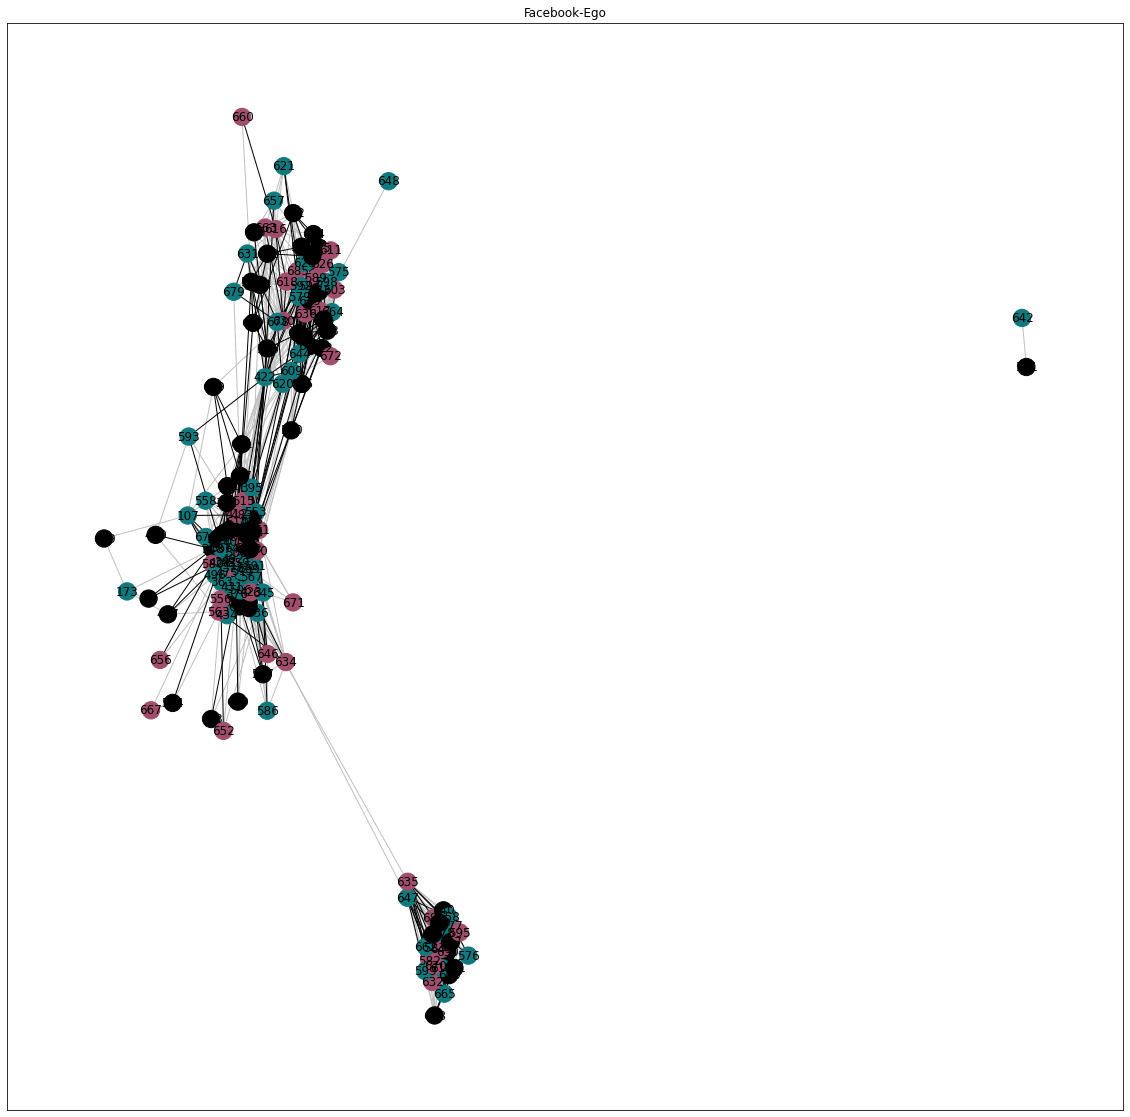

In [13]:
draw_plot_networkx(graphFacebook, colorMap, external, internal, "Facebook-Ego")

# Question (b)

Using the same algorithm, we get again 2 disjoint sets. We can calculate the cut size and the conductance. At the end we plot the network following the same explanations as before.

In [14]:
set4 = sample(list(graphFacebook), 50)
set5 = []
while len(set5) < 50:
  newNode = choice(list(graphFacebook))
  if newNode not in set4:
    set5.append(newNode)

In [15]:
print("Let set T contain this following nodes:", set4, "\nand the set S contain this following nodes:", set5,
      ".\nThe cut size between S and T in the Facebook network is", nx.cut_size(graphFacebook, set4, set5), 
      "and its conductance is", nx.conductance(graphFacebook, set4, set5))

Let set T contain this following nodes: [395, 631, 616, 582, 563, 575, 671, 475, 592, 643, 683, 561, 614, 559, 480, 431, 583, 589, 637, 617, 669, 500, 641, 680, 586, 659, 646, 394, 625, 645, 629, 654, 422, 412, 653, 634, 670, 588, 664, 423, 656, 657, 639, 650, 461, 594, 601, 558, 465, 483] 
and the set S contain this following nodes: [596, 599, 660, 590, 515, 626, 599, 567, 611, 651, 618, 665, 544, 615, 682, 567, 574, 666, 173, 632, 600, 427, 584, 676, 673, 651, 514, 679, 658, 348, 655, 580, 660, 622, 591, 515, 434, 496, 681, 400, 566, 660, 438, 584, 438, 579, 597, 496, 584, 622] .
The cut size between S and T in the Facebook network is 289 and its conductance is 0.27110694183864914


In [16]:
set6 = []
for node in list(graphFacebook.nodes()):
  if node not in set4 and node not in set5:
    set6.append(node)

In [17]:
newNodeGroups = []
newNodeGroups.append(set4)
newNodeGroups.append(set5)
newNodeGroups.append(set6)

In [18]:
newExternal = get_community_edges(newNodeGroups, graphFacebook)[0]
newInternal = get_community_edges(newNodeGroups, graphFacebook)[1]

In [19]:
colorMap = get_color_map(newNodeGroups, graphFacebook)

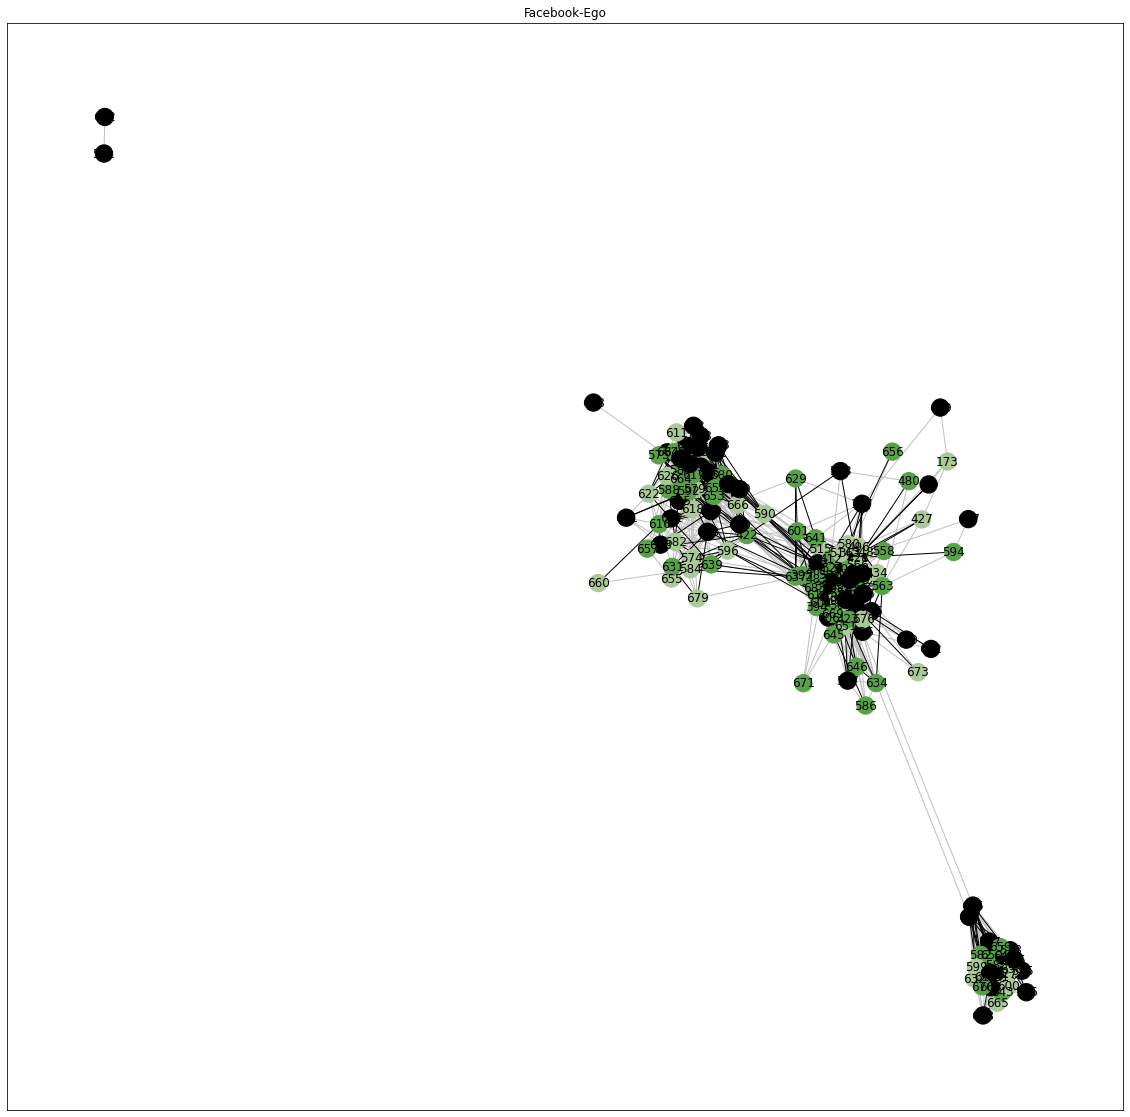

In [20]:
draw_plot_networkx(graphFacebook, colorMap, external, internal, "Facebook-Ego")

# Question (c)

In [21]:
orderedListOfNodes = sorted(list(graphFacebook.nodes()), reverse=False)

In [22]:
laplacianMatrixFacebook = nx.laplacian_matrix(graphFacebook, nodelist = orderedListOfNodes).todense()

print("The Laplacian matrix of the Facebook-Ego is\n",laplacianMatrixFacebook)

The Laplacian matrix of the Facebook-Ego is
 [[ 3  0 -1 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [-1  0  4 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 16]]


# Question (d)

In [30]:
maxCliquePerNode = nx.node_clique_number(graphFacebook)

In [31]:
print(maxCliquePerNode)

{650: 17, 647: 14, 461: 17, 544: 17, 614: 13, 515: 15, 363: 17, 348: 17, 436: 16, 428: 16, 400: 16, 591: 16, 636: 9, 630: 9, 500: 15, 524: 17, 553: 17, 561: 17, 651: 14, 597: 11, 619: 11, 664: 9, 666: 9, 606: 16, 438: 16, 370: 17, 556: 11, 373: 17, 665: 15, 583: 18, 633: 8, 680: 10, 434: 13, 566: 17, 604: 14, 683: 15, 609: 10, 376: 17, 475: 17, 465: 16, 580: 14, 632: 18, 483: 17, 579: 11, 643: 18, 681: 18, 577: 18, 578: 18, 395: 15, 663: 5, 596: 6, 676: 10, 635: 18, 671: 4, 492: 17, 567: 15, 542: 16, 637: 13, 684: 11, 627: 18, 422: 9, 412: 16, 558: 6, 589: 11, 685: 9, 575: 8, 623: 11, 625: 11, 646: 8, 654: 11, 611: 11, 431: 16, 600: 18, 582: 18, 559: 17, 378: 17, 612: 7, 644: 10, 588: 8, 599: 18, 662: 18, 645: 11, 513: 17, 617: 10, 678: 9, 640: 18, 107: 7, 394: 12, 592: 11, 603: 11, 514: 17, 615: 18, 620: 8, 506: 17, 423: 16, 601: 6, 669: 14, 628: 10, 480: 3, 629: 3, 391: 17, 563: 14, 634: 8, 590: 6, 618: 9, 587: 8, 173: 3, 496: 12, 641: 10, 661: 18, 670: 18, 649: 2, 672: 6, 573: 11, 6

In [33]:
dictWithSortedValues = {k: v for k, v in sorted(maxCliquePerNode.items(), key=lambda item: item[1])}

In [34]:
print(dictWithSortedValues)

{649: 2, 648: 2, 642: 2, 581: 2, 480: 3, 629: 3, 173: 3, 594: 3, 656: 3, 34: 3, 593: 3, 660: 3, 667: 3, 671: 4, 655: 4, 427: 4, 610: 4, 657: 4, 673: 4, 652: 4, 663: 5, 639: 5, 621: 5, 596: 6, 558: 6, 601: 6, 590: 6, 672: 6, 574: 6, 679: 6, 612: 7, 107: 7, 616: 7, 584: 7, 631: 7, 586: 7, 682: 7, 633: 8, 575: 8, 646: 8, 588: 8, 620: 8, 634: 8, 587: 8, 622: 8, 636: 9, 630: 9, 664: 9, 666: 9, 422: 9, 685: 9, 678: 9, 618: 9, 653: 9, 598: 9, 680: 10, 609: 10, 676: 10, 644: 10, 617: 10, 628: 10, 641: 10, 605: 10, 626: 10, 597: 11, 619: 11, 556: 11, 579: 11, 684: 11, 589: 11, 623: 11, 625: 11, 654: 11, 611: 11, 645: 11, 592: 11, 603: 11, 573: 11, 677: 11, 394: 12, 496: 12, 614: 13, 434: 13, 637: 13, 576: 13, 647: 14, 651: 14, 604: 14, 580: 14, 669: 14, 563: 14, 515: 15, 500: 15, 665: 15, 683: 15, 395: 15, 567: 15, 436: 16, 428: 16, 400: 16, 591: 16, 606: 16, 438: 16, 465: 16, 542: 16, 412: 16, 431: 16, 423: 16, 650: 17, 461: 17, 544: 17, 363: 17, 348: 17, 524: 17, 553: 17, 561: 17, 370: 17, 37